<a href="https://colab.research.google.com/github/purvajapd/Python-ITW/blob/main/PBL_ITW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

bat = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ipl_batting.csv")
matches = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ipl_matches.csv")
deliveries = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ipl_deliveries.csv")

bat.head()

Mounted at /content/drive


,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18


In [ ]:
matches.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5


###Q **boundary_contribution**

In [ ]:
bat['boundary_contribution'] = (bat['fours']+bat['sixes'])/bat['R']
bat.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,boundary_contribution
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18,0.192308
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18,0.118644
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18,0.090909
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18,0.111111
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18,0.200000


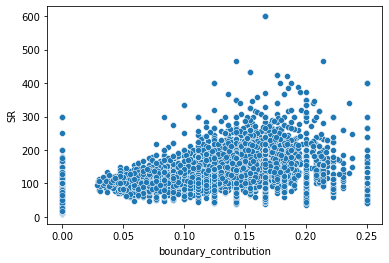

In [ ]:
ax = sns.scatterplot(x="boundary_contribution", y="SR", data=bat)

In [ ]:
boundary_contribution = bat['boundary_contribution'].groupby(bat['batsmen']).sum()

In [ ]:
boundary_contribution = boundary_contribution.reset_index()

In [ ]:
boundary_contribution.sort_values(['boundary_contribution'], axis=0, ascending=False, inplace=True)
boundary_contribution.head(10)

,batsmen,boundary_contribution
424,SK Raina,20.137846
385,RV Uthappa,19.642338
393,S Dhawan,19.483546
487,V Kohli,18.559622
366,RG Sharma,18.349718
95,CH Gayle,17.690974
150,G Gambhir,16.656673
442,SR Watson,16.126717
218,KD Karthik,16.010834
330,PA Patel,15.604900


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


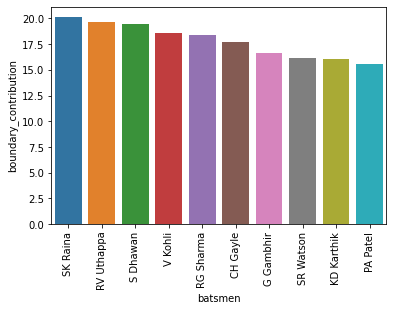

In [ ]:
#top 10 batsman hitting boundries

ax = sns.barplot(boundary_contribution['batsmen'].head(10), boundary_contribution['boundary_contribution'].head(10)).set_xticklabels(boundary_contribution['batsmen'], rotation=90)

###**Q** Top 10 Batsmen



In [ ]:
batsmen = bat['R'].groupby(bat['batsmen']).sum()

In [ ]:
batsman = batsmen.reset_index()

In [ ]:
batsman.sort_values(['R'], axis=0, ascending=False, inplace=True)
batsman.head(10)

,batsmen,R
487,V Kohli,5412.0
424,SK Raina,5368.0
366,RG Sharma,4898.0
113,DA Warner,4706.0
393,S Dhawan,4579.0
95,CH Gayle,4484.0
292,MS Dhoni,4432.0
385,RV Uthappa,4411.0
24,AB de Villiers,4395.0
150,G Gambhir,4217.0


###Q runs made vs balls **faced**

In [ ]:
df = bat
dt = df.match_date
col = list()
for i in dt:
    i = str(i)
    temp = i.split('-')
    col.append(temp[0])
df['year'] = col

df.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,boundary_contribution,year
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18,0.192308,2009
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18,0.118644,2009
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18,0.090909,2009
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18,0.111111,2009
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18,0.200000,2009


In [ ]:
df = df[df['year']=='2018']
df.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,boundary_contribution,year
7876,1,Mumbai Indians,Chennai Super Kings,RG Sharma,c Rayudu b Watson,15.0,18.0,0.0,1.0,1.0,83.33,captain,caught,Watson,Rayudu,1,2018-04-07,0.133333,2018
7877,1,Mumbai Indians,Chennai Super Kings,E Lewis,lbw b Chahar,0.0,2.0,0.0,0.0,0.0,0.00,normal player,lbw,Chahar,no fielder,0,2018-04-07,NaN,2018
7878,1,Mumbai Indians,Chennai Super Kings,Ishan Kishan,c Wood b Imran Tahir,40.0,29.0,0.0,4.0,1.0,137.93,wicket keeper,caught,Imran Tahir,Wood,1,2018-04-07,0.125000,2018
7879,1,Mumbai Indians,Chennai Super Kings,SA Yadav,c Harbhajan Singh b Watson,43.0,29.0,0.0,6.0,1.0,148.27,normal player,caught,Watson,Harbhajan Singh,1,2018-04-07,0.162791,2018
7880,1,Mumbai Indians,Chennai Super Kings,HH Pandya,not out,22.0,20.0,0.0,2.0,0.0,110.00,normal player,not out,no bowler,no fielder,0,2018-04-07,0.090909,2018


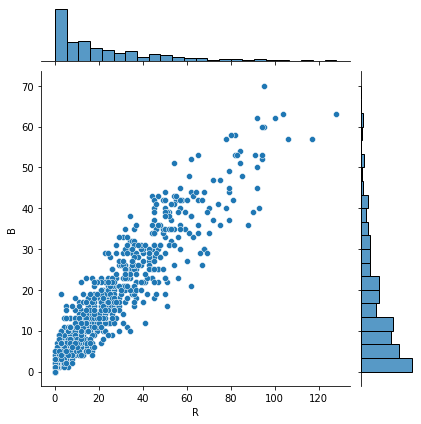

In [ ]:
sns.jointplot(x='R',y='B',data=df)

### Strike rate

In [ ]:
strike_rate = bat['SR'].groupby(bat['batsmen']).agg('sum')

In [ ]:
strike_rate = strike_rate.reset_index()

In [ ]:
strike_rate.sort_values(['SR'], axis=0, ascending=False, inplace=True)

In [ ]:
df = strike_rate.head(10)

In [ ]:
strikerates = strike_rate.head(10)

In [ ]:
runs = strike_rate
runs.head()

,batsmen,SR
424,SK Raina,22585.81
292,MS Dhoni,21878.36
366,RG Sharma,20495.90
385,RV Uthappa,20213.99
487,V Kohli,20030.77


Top 10 SR

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


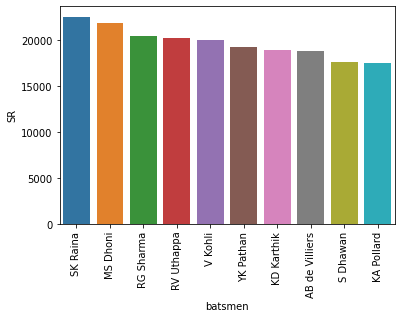

In [ ]:
ax = sns.barplot(df['batsmen'], df['SR']).set_xticklabels(df['batsmen'], rotation=90)

Bottom 10 SR

In [ ]:
strike_rate.sort_values(['SR'], axis=0, ascending=True,inplace=True)

In [ ]:
df = strike_rate.head(10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


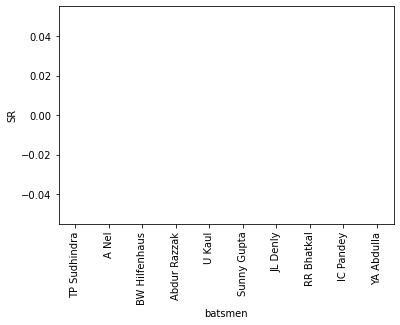

In [ ]:
ax = sns.barplot(df['batsmen'], df['SR']).set_xticklabels(df['batsmen'], rotation=90)

### Q1

In [ ]:
# Solving Real problems Q1
matches.dtypes

match_date        object
Ground            object
Team 1            object
Team 2            object
Winner            object
year               int64
month              int64
day                int64
win_mode          object
margin           float64
toss_winner       object
toss_decision     object
match_no           int64
dtype: object

In [ ]:
Date = matches.match_date
key = []
repeated = []
for i in Date:
  if i in repeated:
    num_of_date = repeated.count(i)
    temp = i.split('-')
    temp1 = temp[0]+temp[1]+temp[2]+'0'+str(num_of_date+1)
    repeated.append(i)
    key.append(temp1)
  else:
    temp = i.split('-')
    temp1 = temp[0]+temp[1]+temp[2]+'01'
    key.append(temp1)
    repeated.append(i)

In [ ]:
matches['match_key'] = key
matches.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,match_key
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,2008041801
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,2008041901
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,2008041902
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,2008042001
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,2008042002


### Dissmisal

------------------


In [ ]:
bat['wicket_status'].unique()

array(['c Hayden b Thushara', 'not out', 'c Dhoni b Gony', ...,
       'c †Kamran Akmal b Pathan', 'run out (Ntini)',
       'c Dhoni b Muralitharan'], dtype=object)

In [ ]:
wicket_status = []
for i in bat['wicket_status']:
    if 'lbw' in i:
        wicket_status.append('lbw')
    elif 'run out' in i:
        wicket_status.append('run out')
    elif 'not out' in i:
        wicket_status.append('not out')
    elif 'retired' in i:
        wicket_status.append('retires')
    elif 'hit wicket' in i:
        wicket_status.append('hit wicket')
    elif 'absent' in i:
        wicket_status.append('absent from match/ injured')
  
    elif 'obstructing' in i:
        wicket_status.append('obstructing')
    elif 'b' in i:
        if 'c' in i:
            wicket_status.append('caught and out')
        else:
            wicket_status.append('clean bold')

In [ ]:
bat['dismissal_status'] = wicket_status

In [ ]:
bat.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,boundary_contribution,year,dismissal_status
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,130.00,normal player,caught,Thushara,Hayden,1,2009-04-18,0.192308,2009,caught and out
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,120.40,captain,not out,no bowler,no fielder,0,2009-04-18,0.118644,2009,not out
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,104.76,normal player,caught,Gony,Dhoni,1,2009-04-18,0.090909,2009,caught and out
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,128.57,normal player,caught,Gony,Gony,1,2009-04-18,0.111111,2009,caught and out
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,125.00,normal player,caught,Joginder Sharma,Hayden,1,2009-04-18,0.200000,2009,caught and out


In [ ]:
bowler = []
fielder = []
fielder_involved = []
for temp in bat['wicket_status']:
  if 'lbw' in temp or 'hit wicket' in temp:
    name = temp.split("b ",1)[1] 
    bowler.append(name)
    fielder.append('no fielder')
    fielder_involved.append(0)
  elif 'run out' in temp or 'not out' in temp or 'retired' in temp or 'absent' in temp or 'obstructing' in temp:
    bowler.append('no bowler')
    fielder.append('no fielder')
    fielder_involved.append(0)
  elif 'st ' in temp:
    names = temp.split("st ",1)[1] 
    temps = names.split("b ",1)
    sname = temps[0]
    bname = temps[1]
    bowler.append(bname)
    fielder.append(sname)
    fielder_involved.append(1)
  elif 'b ' in temp:
    if 'c ' in temp:
      names = temp.split("c ",1)[1] 
      temps = names.split("b ",1)
      sname = temps[0]
      bname = temps[1]
      bowler.append(bname)
      if sname == "& " or sname == "&":
        fielder.append(bname)
      else:
        fielder.append(sname)
      fielder_involved.append(1)
    else:
      name = temp.split("b ",1)[1] 
      bowler.append(name)
      fielder.append('no fielder')
      fielder_involved.append(0)

In [ ]:
bat['bowler_name'] = bowler
bat['fielder_name'] = fielder
bat['fielder_involved'] = fielder_involved

In [ ]:
bat.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,...,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,boundary_contribution,year,dismissal_status,fielder_name,fielder_involved
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,...,caught,Thushara,Hayden,1,2009-04-18,0.192308,2009,caught and out,Hayden,1
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59.0,49.0,0.0,7.0,0.0,...,not out,no bowler,no fielder,0,2009-04-18,0.118644,2009,not out,no fielder,0
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22.0,21.0,0.0,2.0,0.0,...,caught,Gony,Dhoni,1,2009-04-18,0.090909,2009,caught and out,Dhoni,1
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9.0,7.0,0.0,1.0,0.0,...,caught,Gony,Gony,1,2009-04-18,0.111111,2009,caught and out,Gony,1
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5.0,4.0,0.0,1.0,0.0,...,caught,Joginder Sharma,Hayden,1,2009-04-18,0.200000,2009,caught and out,Hayden,1


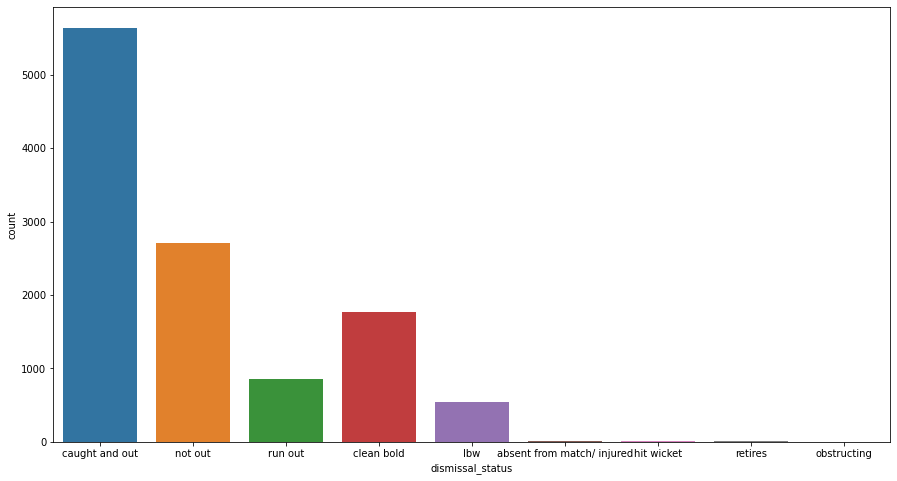

In [ ]:
import seaborn as sns
ax = sns.countplot(x="dismissal_status", data=bat)
ax.figure.set_size_inches(15,8)